# EDA 
<P>Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves investigating datasets to summarize their main characteristics, often using visualizations. It helps in understanding patterns, detecting anomalies, and determining relationships between variables before applying models. Key aspects of EDA include:

Data Summarization: Identifying missing values
Visualizations: Using histograms, scatter plots, box plots, and correlation matrices to interpret data distributions and relationships.
Feature Engineering: Identifying relevant variables and transforming data for better model performance.</P>

<title>IMPORTING THE PACKAGES</title>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# importing the PACKAGES

<title>IMPORTING THE PACKAGES</title>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#IMPORTING THE PACKAGES

# Importing the dataset and Transforming the data

In [9]:
data= pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\data.csv")
data.drop(columns=["id", "Unnamed: 32"], inplace=True)
data["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"])
data.head()
# importing the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# information about the dataframe

data.info() # information about the dataframe

In [13]:
data.describe() # description of the dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# sum of the null values (if any)

In [15]:

data.isnull().sum() # sum of the null values (if any)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# droping the unnecesary data from the data set

In [42]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
#droping the unnecesary data from the data set

# Setting the standard scaler

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Setting the standard scaler

# #splitting the dataset to training and testing dataset

In [18]:
#splitting the dataset to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [44]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy : 0.9736842105263158
Precision: 0.9761904761904762
Recall   : 0.9534883720930233
F1 Score : 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


# K-Nearest Neighbors

In [46]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy : 0.9473684210526315
Precision: 0.9302325581395349
Recall   : 0.9302325581395349
F1 Score : 0.9302325581395349
Confusion Matrix:
 [[68  3]
 [ 3 40]]


# Support Vector Machine

In [30]:

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1 Score :", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine
Accuracy : 0.9736842105263158
Precision: 0.9761904761904762
Recall   : 0.9534883720930233
F1 Score : 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


# Naive Bayes

In [48]:

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes")
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall   :", recall_score(y_test, y_pred_nb))
print("F1 Score :", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes
Accuracy : 0.9649122807017544
Precision: 0.975609756097561
Recall   : 0.9302325581395349
F1 Score : 0.9523809523809523
Confusion Matrix:
 [[70  1]
 [ 3 40]]


# Decision Tree

In [50]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy : 0.9298245614035088
Precision: 0.9069767441860465
Recall   : 0.9069767441860465
F1 Score : 0.9069767441860465
Confusion Matrix:
 [[67  4]
 [ 4 39]]


# Random Forest

In [36]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest
Accuracy : 0.9649122807017544
Precision: 0.975609756097561
Recall   : 0.9302325581395349
F1 Score : 0.9523809523809523
Confusion Matrix:
 [[70  1]
 [ 3 40]]


# Model names and accuracies and Plotting

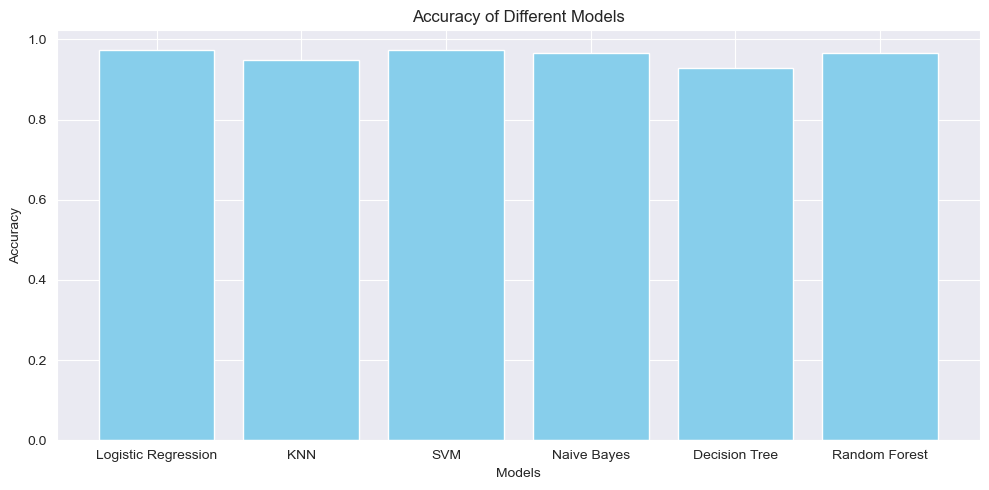

In [75]:
import matplotlib.pyplot as plt


models = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()


# Countplot

C:\Users\tajud\AppData\Local\Temp\ipykernel_39364\3410482314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='Set2')


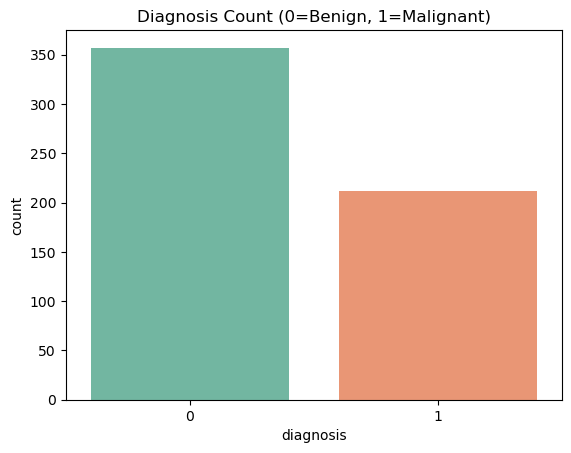

In [52]:
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title('Diagnosis Count (0=Benign, 1=Malignant)')
plt.show()


# HISTPLOT

C:\Users\tajud\anaconda3\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
C:\Users\tajud\anaconda3\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='texture_mean', ylabel='Count'>

C:\Users\tajud\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\tajud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


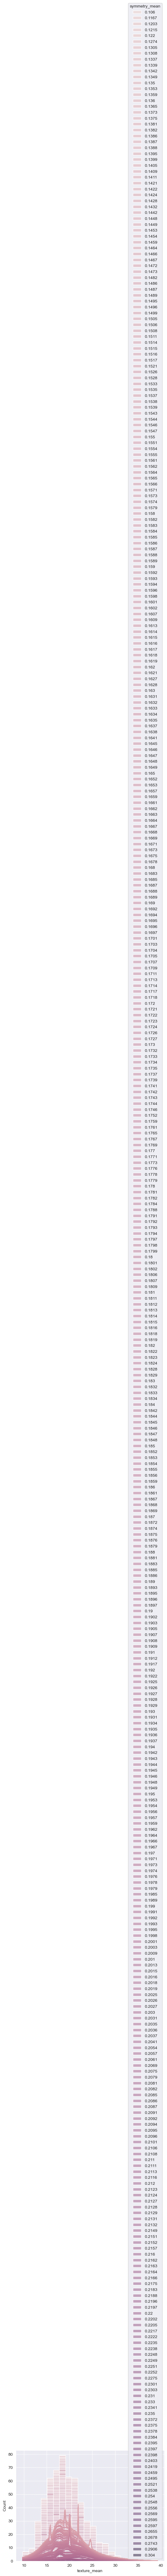

In [54]:
sns.set_style("darkgrid")
sns.histplot(data=data,x='texture_mean',kde=True,hue='symmetry_mean',multiple='stack')

# HISTPLOT

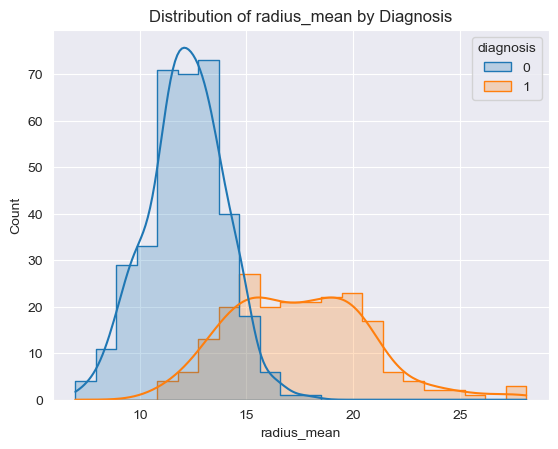

In [55]:
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=True, element='step')
plt.title('Distribution of radius_mean by Diagnosis')
plt.show()


# BOXPLOT

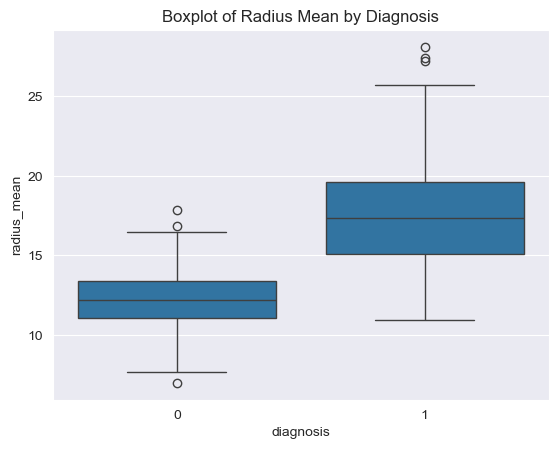

In [56]:

sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title("Boxplot of Radius Mean by Diagnosis")
plt.show()


# VIOLIN PLOT

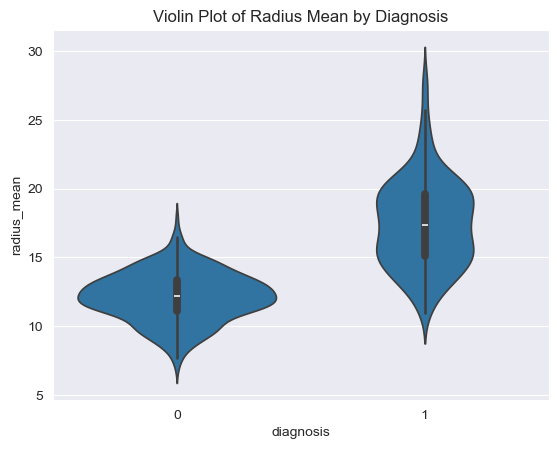

In [57]:

sns.violinplot(x='diagnosis', y='radius_mean', data=data)
plt.title("Violin Plot of Radius Mean by Diagnosis")
plt.show()


# CORRELATION HEATMAP OF FEATURES

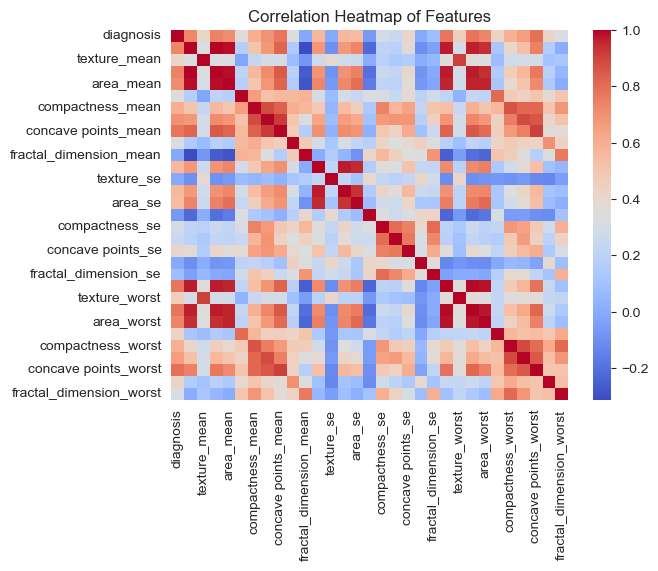

In [58]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


# PAIRPLOT OF SELECTED FEATURES

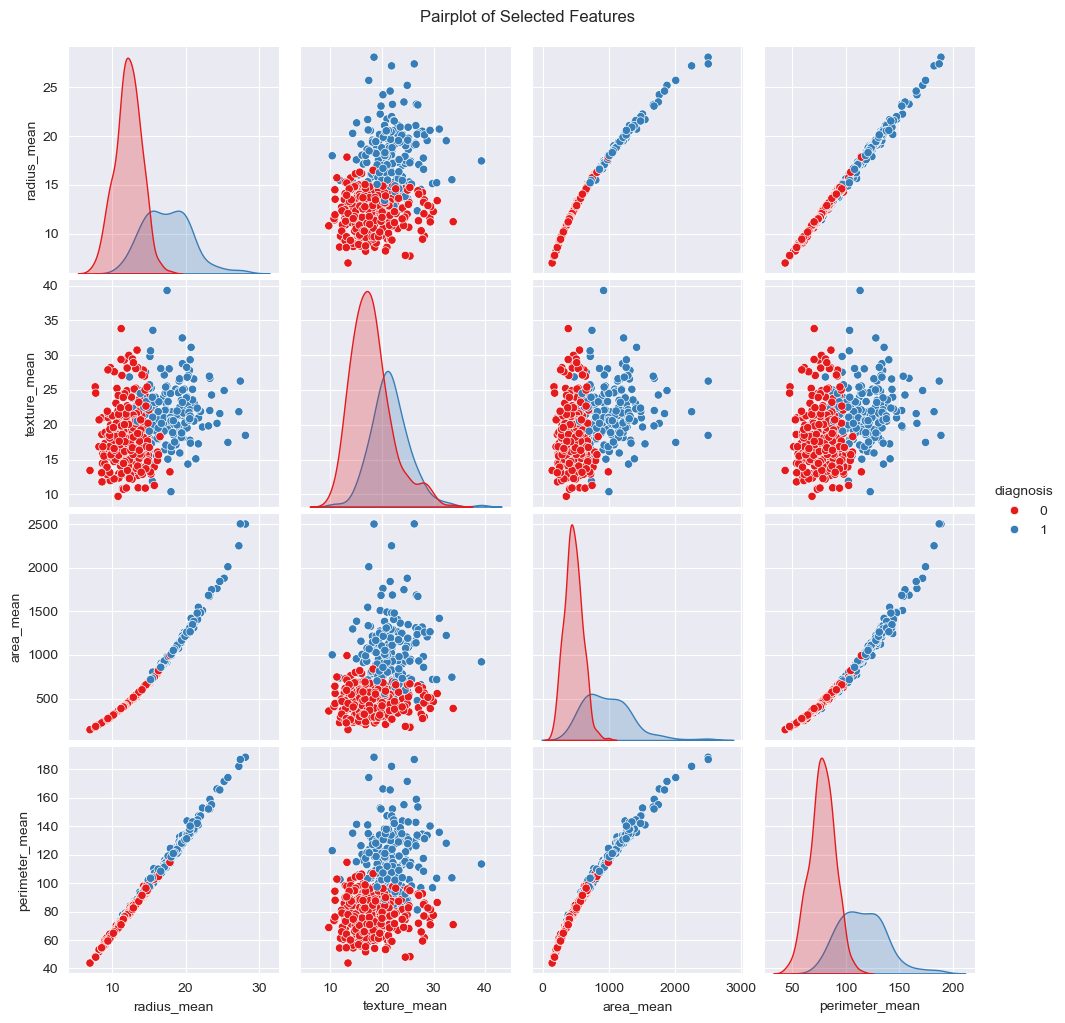

In [59]:
sns.pairplot(data[['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'diagnosis']], hue='diagnosis', palette='Set1')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
